# Here we will analyse spread out Bragg peak (SOBP) data from the GEANT4 simulation and compare it to the experimental data.

In [14]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy.special as sp
import pandas as pd

In [25]:
#reding data from file

data = pd.read_excel('modhadr2.ods')
data.columns = ['Depth', 'Dose']
data


,Depth,Dose
0,0,3.957620e-06
1,1,3.883810e-06
2,2,3.903010e-06
3,3,3.690620e-06
4,4,3.874540e-06
...,...,...
365,365,8.373630e-10
366,366,9.369870e-10
367,367,1.274970e-09
368,368,2.514840e-09


### GEANT4 GENERATED BRAGG PEAK USING O16 WITH 992 MeV energy

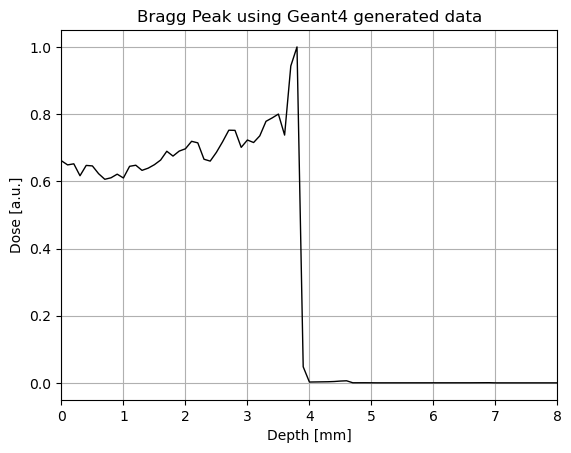

In [26]:
plt.plot(data['Depth']/10, data['Dose']/data['Dose'].max(), color = 'black', linewidth = 1)
plt.xlim(0,8)
plt.grid()
#x axis is dose in Gy


plt.xlabel('Depth [mm]')
plt.ylabel('Dose [a.u.]')
plt.title('Bragg Peak using Geant4 generated data')
plt.show()


## NOW PLOTTING EXPERIMENTAL DATA


In [8]:
data1 = pd.read_excel('exp_spreadout.ods', header = None)
data1.columns = ['Depth', 'Dose'] 
data1

,Depth,Dose
0,2.248,1.173093
1,2.303,1.183804
2,2.349,1.165038
3,2.400,1.186064
4,2.449,1.171375
...,...,...
65,5.501,-0.007085
66,5.552,0.002345
67,5.597,-0.003514
68,5.650,0.001305


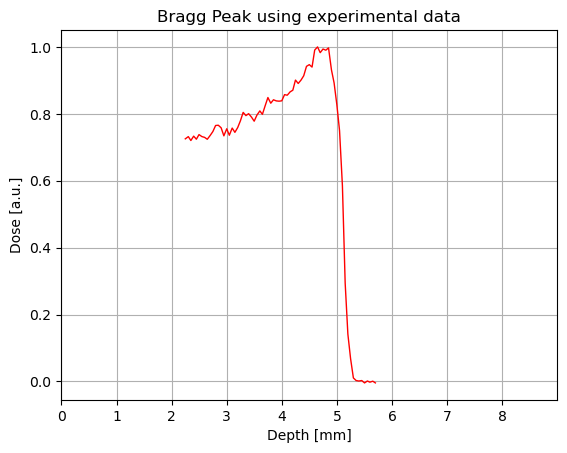

In [9]:
plt.plot(data1['Depth'], data1['Dose']/data1['Dose'].max(), color = 'red', linewidth = 1)
plt.xlim(0,9)
plt.xticks(np.linspace(0,9,300))
plt.xticks(np.arange(0,9,1))
plt.grid()
plt.xlabel('Depth [mm]')
plt.ylabel('Dose [a.u.]')
plt.title('Bragg Peak using experimental data')
plt.show()

### Bragg peak for 16O using experimental data obtained with silicon detector

## COMAPRISON OF SIMULATED AND EXPERIMENTAL DATA

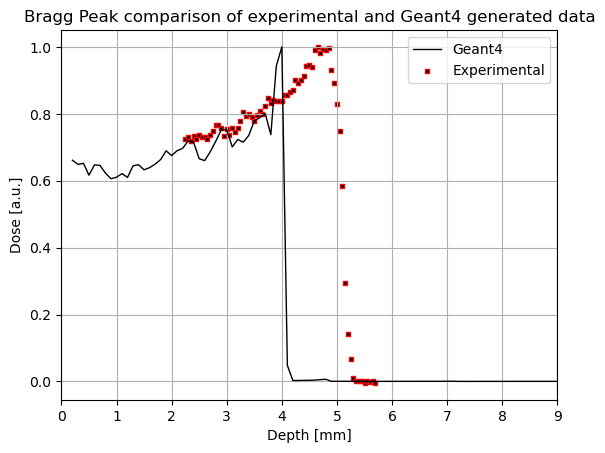

In [27]:
plt.plot(0.2+data['Depth']/10, data['Dose']/data['Dose'].max(),color = 'black', linewidth = 1 )
plt.scatter(data1['Depth'], data1['Dose']/data1['Dose'].max(),marker='s', facecolors='black', edgecolors='r', s=10 )

plt.xlim(0,9)
plt.grid()
#add error bars
#plt.errorbar(data1['Depth'], data1['Dose']/data1['Dose'].max(), yerr = 0.05 , fmt = 'none', ecolor = 'black', capsize = 2)
plt.xlabel('Depth [mm]')
plt.ylabel('Dose [a.u.]')
plt.legend(['Geant4', 'Experimental'])
plt.title('Bragg Peak comparison of experimental and Geant4 generated data')




#energy 
plt.show()

## Now we are proceeding with LET calculation

### data are obtained from geant4 simulation and can be found in let.out file.

In [16]:
dataLET = pd.read_excel('let_1_mil.ods', header = 0)
dataLET

,i,j,k,LDT,LTT,proton_D,proton_T,deuteron_D,deuteron_T,triton_D,...,Si28_D,Si28_T,Si29_D,Si29_T,Si30_D,Si30_T,P29_D,P29_T,P30_D,P30_T
0,0,0,0,163.48400,106.52900,9.85811,3.97579,14.30420,6.25761,15.36980,...,1822.73,1801.73,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,154.03300,106.85400,9.83736,3.99243,13.09490,5.81501,14.03130,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,157.56700,107.42200,8.69494,3.62884,12.73300,5.82802,13.87190,...,2159.00,2159.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,158.47400,107.97100,9.41563,3.62765,13.18950,5.90839,13.77330,...,2151.38,2141.60,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,161.07900,108.69200,8.48757,3.37199,12.45310,5.67723,13.83230,...,2149.17,2149.17,2185.09,2185.09,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0,0,8.26233,2.95779,5.58793,2.15145,6.82038,3.26277,11.08900,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
396,396,0,0,41.75330,3.06365,5.84964,2.17003,6.35251,3.20035,10.70800,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
397,397,0,0,9.34131,3.01932,5.28489,2.21866,7.27365,3.46794,7.80654,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
398,398,0,0,7.28117,3.07384,7.74180,2.34923,6.30660,3.43082,8.04665,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


## We caluclate separatelly LET track and LET dose

# First we calculate LET dose

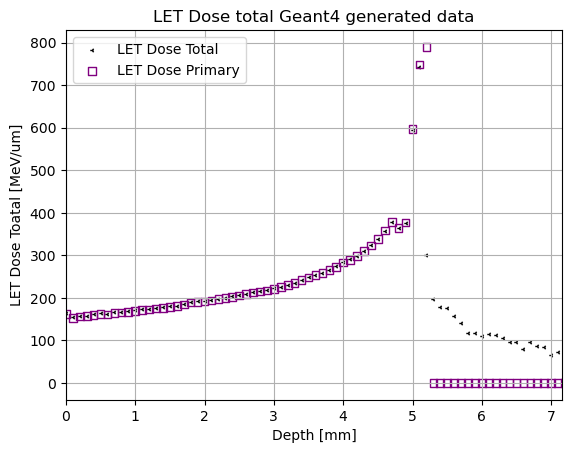

In [17]:

plt.scatter(dataLET['i']/10, dataLET['LDT'], color = 'black', marker="3", s=10, linewidth = 1)
plt.scatter(dataLET['i']/10, dataLET['O16_1_D'], color = 'purple', marker='s', facecolors='none', s=30, linewidth = 1)
plt.xlim(0,7.155)

plt.grid()

plt.xlabel('Depth [mm]')
plt.ylabel('LET Dose Toatal [MeV/um]')
plt.title('LET Dose total Geant4 generated data')
plt.legend(['LET Dose Total', 'LET Dose Primary'])
plt.show()


# Then we calculate LET track

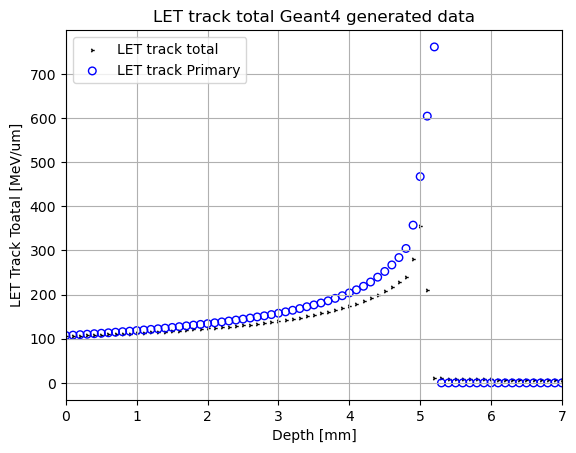

In [18]:

plt.scatter(dataLET['i']/10, dataLET['LTT'], color = 'black', marker="4", s=10, linewidth = 1)
plt.scatter(dataLET['i']/10, dataLET['O16_1_T'], color = 'blue', marker='o', facecolors='none', s=30, linewidth = 1)

plt.xlim(0,7)

plt.grid()

plt.xlabel('Depth [mm]')
plt.ylabel('LET Track Toatal [MeV/um]')
plt.title('LET track total Geant4 generated data')
plt.legend(['LET track total', 'LET track Primary'])
plt.show()

## COMPARISON WITH EXPERIMENTAL RESULTS

### We have calculated yf and yd for LET track and LET dose respectively. Now we are going to compare them.
### yf and yd are calculated using data obtained from MCA. 

In [19]:
#read ods file

experimental_data1 = pd.read_excel('yf_yf_toolkit.ods')
#first column is yf
#second column is yd
experimental_data1.columns = ['yf', 'yd', 'depth', 'gaf']
experimental_data1

,yf,yd,depth,gaf
0,88.887157,139.812040,0.000,0
1,101.886751,162.335308,1.065,3
2,110.861550,186.128704,2.130,6
3,126.623604,216.816130,3.195,9
4,173.536334,283.810936,4.260,12
5,212.902430,376.764858,4.615,13
6,181.743891,566.397482,4.970,14
7,26.114108,142.562338,6.035,17
8,22.592371,110.938458,6.390,18
9,19.408213,88.683608,6.745,19


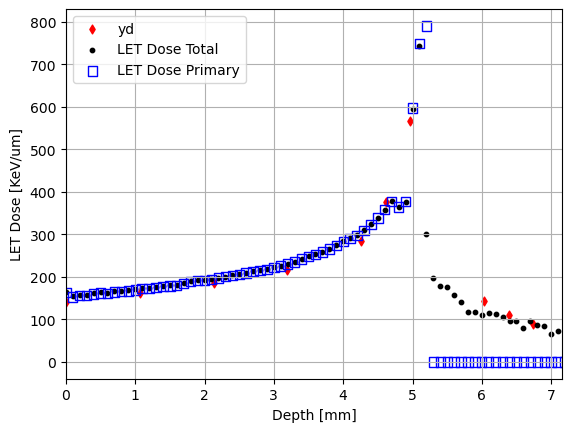

In [20]:
plt.scatter(experimental_data1['depth'], experimental_data1['yd'], marker="d", facecolors='red', edgecolors='red', s=20)


plt.scatter(dataLET['i']/10, dataLET['LDT'], color = 'black', marker='o', s=10, linewidth = 1)
plt.scatter(dataLET['i']/10, dataLET['O16_1_D'], color = 'blue', marker='s', facecolors='none', s=45, linewidth = 1)
plt.xlim(0,7.155)
plt.xlabel('Depth [mm]')
plt.ylabel('LET Dose [KeV/um]')
plt.grid()
plt.legend(['yd', 'LET Dose Total', 'LET Dose Primary'])
plt.show()

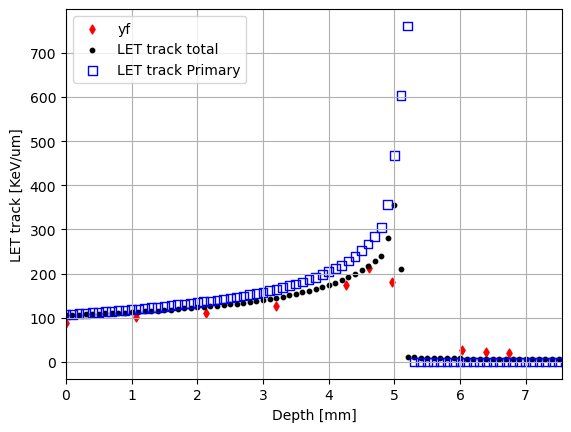

In [21]:
#plot let track total and let track primary and yf
plt.scatter(experimental_data1['depth'], experimental_data1['yf'], marker="d", facecolors='red', edgecolors='red', s=20)

plt.scatter(dataLET['i']/10, dataLET['LTT'], color = 'black', marker='o', s=10, linewidth = 1)
plt.scatter(dataLET['i']/10, dataLET['O16_1_T'], color = 'blue', marker='s', facecolors='none', s=40, linewidth = 1)  
plt.xlim(0,7.55)
plt.xlabel('Depth [mm]')
plt.ylabel('LET track [KeV/um]')
plt.grid()
plt.legend(['yf', 'LET track total', 'LET track Primary'])
plt.show()

In [22]:
#detector is moved for 80 micro meters.
import pandas as pd
dataLET80=pd.read_excel('let_80um.ods')
dataLET80 = dataLET80[['i', 'j', 'k', 'LDT', 'LTT']]
#divide by 10 depth i to mm
dataLET80['i']=dataLET80['i']/10
dataLET80



,i,j,k,LDT,LTT
0,0.0,0,0,130.88700,104.01600
1,0.1,0,0,145.90200,106.11500
2,0.2,0,0,151.75800,107.45500
3,0.3,0,0,158.76600,108.82100
4,0.4,0,0,157.57400,109.07600
...,...,...,...,...,...
395,39.5,0,0,4.66913,2.39140
396,39.6,0,0,5.12776,2.47126
397,39.7,0,0,5.36276,2.57463
398,39.8,0,0,584.40800,14.23920


In [2]:
dataLET = pd.read_excel('let_1_mil.ods', header = 0)
dataLET = dataLET[['i', 'j', 'k', 'LDT', 'LTT']]
#divide by 10 depth in mm
dataLET['LDT'] = dataLET['LDT']/10

dataLET

,i,j,k,LDT,LTT
0,0,0,0,16.348400,106.52900
1,1,0,0,15.403300,106.85400
2,2,0,0,15.756700,107.42200
3,3,0,0,15.847400,107.97100
4,4,0,0,16.107900,108.69200
...,...,...,...,...,...
395,395,0,0,0.826233,2.95779
396,396,0,0,4.175330,3.06365
397,397,0,0,0.934131,3.01932
398,398,0,0,0.728117,3.07384


In [23]:

# Subtract corresponding columns
subtracted_data = dataLET.iloc[:, 3:] - dataLET80.iloc[:, 3:]

# Create a new dataframe with the subtracted values
subtracted_df = pd.concat([dataLET[['i', 'j', 'k']], subtracted_data], axis=1)
#divide depth i by 10 to get mm
subtracted_df['i'] = subtracted_df['i']/10

# Print the resulting dataframe
print(subtracted_df)

        i  j  k  Al24_D  Al24_T  Al25_D  Al25_T  Al26_D  Al26_T  Al27_D  ...  \
0     0.0  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
1     0.1  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
2     0.2  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
3     0.3  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
4     0.4  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
..    ... .. ..     ...     ...     ...     ...     ...     ...     ...  ...   
395  39.5  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
396  39.6  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
397  39.7  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
398  39.8  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   
399  39.9  0  0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     Si30_D  Si30_T  alpha_D  alpha_T  

In [24]:
#save substraced dtaaframe as ods file
subtracted_df.to_excel('subtracted_data.xlsx')


In [25]:
#calculate errors

import pandas as pd

# Read the data from the provided dataframe
data = pd.read_excel('subtracted_data.xlsx')

# Uncertainty in detector positioning (80 um)
delta_detector_position = 0.08  # in cm

# Sensitivities for LETdose and LETtrack
sensitivity_let_dose = data['LDT']
sensitivity_let_track = data['LTT']

# Calculate errors in LETdose and LETtrack
error_let_dose = sensitivity_let_dose * delta_detector_position
error_let_track = sensitivity_let_track * delta_detector_position
# Create a new dataframe to store the errors
error_df = pd.DataFrame({
    'i': data['i'],
    'j': data['j'],
    'k': data['k'],
    'Error_LET_dose': error_let_dose,
    'Error_LET_track': error_let_track
})

# Print the resulting dataframe with errors
error_df.to_excel('error_data_LET.xlsx', index=False)

#read let data



In [26]:
let_data = pd.read_excel('let_1_mil.ods', header = 0)
data=pd.read_excel('error_data_LET.xlsx')

i=let_data['i']
j=let_data['j']
k=let_data['k']
real_let_dose = let_data['LDT'] 
real_let_track = let_data['LTT'] 

sensitivity_let_dose = data['Error_LET_dose']
sensitivity_let_track = data['Error_LET_track']

errors_final=pd.DataFrame({

    'i':i,
    'j':j,
    'k':k,
    'real_let_dose':real_let_dose,
    'real_let_track':real_let_track,
    'error_let_dose':sensitivity_let_dose,
    'error_let_track':sensitivity_let_track


})

errors_final.to_excel('errors_final.xlsx')




In [27]:
#interpolation if depth values and let


import pandas as pd
import numpy as np

# Read the experimental and Geant4 dataframes

exp_data=pd.read_excel('errors_finaldata.xlsx')
geant_data = pd.read_excel('errors_final.xlsx')

# Define the depth values from the experimental data
exp_depth_values = exp_data['depth']

# Interpolate LET and error values from Geant4 data for the experimental depth values
interpolated_let_dose_values = np.interp(exp_depth_values, geant_data['i']/10, geant_data['real_let_dose'])
interpolated_let_track_values= np.interp(exp_depth_values, geant_data['i']/10, geant_data['real_let_track'])


interpolated_error_values = np.interp(exp_depth_values, geant_data['i']/10, geant_data['error_let_dose'])
interpolated_error_track_values= np.interp(exp_depth_values, geant_data['i']/10, geant_data['error_let_track'])


# Create a new dataframe with the interpolated values
interpolated_data = pd.DataFrame({
    'Depth': exp_depth_values,
    'LET_dose': interpolated_let_dose_values,
    'LET_track': interpolated_let_track_values,
    'error_let_dose': abs(interpolated_error_values),
    'error_let_track': abs(interpolated_error_track_values)
})

# Print the resulting dataframe with interpolated values
print(interpolated_data)
interpolated_data.to_excel('LET_INTER_ERRORS.xlsx')


   Depth    LET_dose   LET_track  error_let_dose  error_let_track
0  0.000  163.484000  106.529000        2.607760         0.201040
1  1.065  172.745900  113.313300        0.689940         0.020512
2  2.130  196.228300  125.023100        0.040344         0.203984
3  3.195  230.690800  145.132200        0.482508         0.111900
4  4.260  305.708200  188.722800        2.181616         0.809120
5  4.615  361.172350  219.412750        4.474880         1.564840
6  4.970  530.056400  333.690700       12.896672         7.483384
7  6.035  112.254850    7.754082        0.152276         0.068760
8  6.390   97.933540    7.096073        2.882021         0.038517
9  6.745   91.675335    6.701268        0.661582         0.075144


### STATISTICAL TESTS

In [33]:
import pandas as pd

import numpy as np
#read the table for let values 

forLET=pd.read_excel('LET_INTER_ERRORS.xlsx',sheet_name='Sheet1')
forLET = forLET[['Depth', 'LET_dose', 'LET_track', 'error_let_dose', 'error_let_track']]

forYD=pd.read_excel('errors_finaldata.xlsx',sheet_name='Sheet1')

forYD.head()


,depth,yf,yd,sigma_yf,sigma_yd
0,0.000,88.550730,139.669090,0.658432,0.709458
1,1.065,98.550324,162.215479,0.667155,0.697457
2,2.130,110.525123,186.021382,0.671810,0.681999
3,3.195,126.287177,216.719974,0.675931,0.662999
4,4.260,133.199907,283.854062,0.725729,0.633315


In [34]:
# Extracting columns from arrays using correct indexing
let_dose = forLET['LET_dose']  # Column 2
let_track = forLET['LET_track']  # Column 3
error_let_dose = forLET['error_let_dose']  # Column 4
error_let_track = forLET['error_let_track']  # Column 5

ydose = forYD['yd']  # Column 2
ytrack = forYD['yf']  # Column 3
error_ydose = forYD['sigma_yd']  # Column 4
error_ytrack = forYD['sigma_yf']  # Column 5


In [35]:
import pandas as pd

# Assuming you have the correct column names and data frames
# let_dose, let_track, ydose, ytrack are extracted columns as before

# Calculate the differences
diff_dose = let_dose - ydose
diff_track = let_track - ytrack
error_let_dose=error_let_dose**2
error_let_track=error_let_track**2
error_ydose=error_ydose**2
error_ytrack=error_ytrack**2
numinator=error_let_dose**2+error_ydose**2


# Create a new DataFrame
diff_df = pd.DataFrame({
    'Difference_Dose': diff_dose,
    'Difference_Track': diff_track,
    'Error_LET_Dose': error_let_dose,
    'Error_LET_Track': error_let_track,
    'Error_Y_Dose': error_ydose,
    'Error_Y_Track': error_ytrack
    
})

# Print or view the new DataFrame
print(diff_df)


   Difference_Dose  Difference_Track  Error_LET_Dose  Error_LET_Track  \
0        23.814910         17.978270        6.800412         0.040417   
1        10.530421         14.762976        0.476017         0.000421   
2        10.206918         14.497977        0.001628         0.041609   
3        13.970826         18.845023        0.232814         0.012522   
4        21.854138         55.522893        4.759448         0.654675   
5       -15.515425          6.846747       20.024551         2.448724   
6       -36.718009        152.283236      166.324149        56.001036   
7       -31.490838        -18.023599        0.023188         0.004728   
8       -14.003955        -15.159871        8.306044         0.001484   
9         2.106133        -12.370518        0.437691         0.005647   

   Error_Y_Dose  Error_Y_Track  
0      0.503330       0.433533  
1      0.486446       0.445096  
2      0.465122       0.451328  
3      0.439567       0.456883  
4      0.401087       0.526683 

In [36]:
import numpy as np
from scipy.stats import chi2

# let_dose represents the expected data from the simulation
# ydose represents the experimental data

# Create a histogram of the expected data (let_dose) using the same bins as ydose
hist_let, _ = np.histogram(let_dose, bins=len(ydose), range=(np.min(ydose), np.max(ydose)))

# Calculate the observed frequencies for ydose
observed_freq, _ = np.histogram(ydose, bins=len(ydose), range=(np.min(ydose), np.max(ydose)))

# Calculate the expected error for each bin based on error_let_dose and error_ydose
expected_error = np.sqrt((hist_let + error_let_dose)**2 + (observed_freq + error_ydose)**2)

# Calculate the chi-square statistic
chi_square = np.sum((observed_freq - hist_let)**2 / expected_error)

# Calculate degrees of freedom and critical value
dof = len(observed_freq) - 1  # Degrees of freedom
alpha = 0.05  # Significance level
cv = chi2.ppf(1 - alpha, dof)  # Critical value
p_value = 1 - chi2.cdf(chi_square, dof)

# Perform the chi-square test and print the results
if p_value < alpha:
    result = "Reject H0 (significant difference)"
else:
    result = "Fail to reject H0 (no significant difference)"

print("Observed Frequencies:", observed_freq)
print("Expected Frequencies (let_dose):", hist_let)
#print("Expected Error:", expected_error)
print("Chi-square:", chi_square)
print("Degrees of Freedom:", dof)
print("Critical Value:", cv)
print("P-value:", p_value)  # Include the calculated p-value
print("Result:", result)


Observed Frequencies: [2 3 2 0 1 0 1 0 0 1]
Expected Frequencies (let_dose): [3 2 2 0 1 1 0 0 0 1]
Chi-square: 0.38628213700987557
Degrees of Freedom: 9
Critical Value: 16.918977604620448
P-value: 0.9999900198442648
Result: Fail to reject H0 (no significant difference)


In [37]:
import numpy as np
from scipy.stats import chi2

# let_dose represents the expected data from the simulation
# ydose represents the experimental data

# Create a histogram of the expected data (let_dose) using the same bins as ydose
hist_let, _ = np.histogram(let_track, bins=len(ytrack), range=(np.min(ytrack), np.max(ytrack)))

# Calculate the observed frequencies for ydose
observed_freq, _ = np.histogram(ytrack, bins=len(ytrack), range=(np.min(ytrack), np.max(ytrack)))

# Calculate the expected error for each bin based on error_let_dose and error_ydose
expected_error = np.sqrt((hist_let + error_let_dose)**2 + (observed_freq + error_ydose)**2)

# Calculate the chi-square statistic
chi_square = np.sum((observed_freq - hist_let)**2 / expected_error)

# Calculate degrees of freedom and critical value
dof = len(observed_freq) - 1  # Degrees of freedom
alpha = 0.05  # Significance level
cv = chi2.ppf(1 - alpha, dof)  # Critical value
p_value = 1 - chi2.cdf(chi_square, dof)

# Perform the chi-square test and print the results
if p_value < alpha:
    result = "Reject H0 (significant difference)"
else:
    result = "Fail to reject H0 (no significant difference)"

print("Observed Frequencies:", observed_freq)
print("Expected Frequencies (let_dose):", hist_let)
#print("Expected Error:", expected_error)
print("Chi-square:", chi_square)
print("Degrees of Freedom:", dof)
print("Critical Value:", cv)
print("P-value:", p_value)  # Include the calculated p-value
print("Result:", result)


Observed Frequencies: [3 0 0 1 2 2 0 0 1 1]
Expected Frequencies (let_dose): [0 0 0 0 2 1 1 0 1 0]
Chi-square: 2.4806508458489236
Degrees of Freedom: 9
Critical Value: 16.918977604620448
P-value: 0.9813993296558174
Result: Fail to reject H0 (no significant difference)
